In [12]:

import matplotlib.image as mpimg
# Split the txt file at ','
# Good example, T4 with cleanup 13
# T7 - missing edge

# file names -- '20170123_I01_003.czi - 20170123_I01_0030000.txt', 
# '7_20170123_I01_003.czi - 20170123_I01_0030000.txt', ''MAX_20170123_I01_003-Scene-4-P4-split_T0.txt''
# 002_20170123_I01_002.czi - 20170123_I01_0020000

# with open('20170123_I01_003.czi - 20170123_I01_0030030.txt','r') as f:
#     img=mpimg.imread('20170123_I01_003.czi - 20170123_I01_0030030.tif')
#     a = [l.split(',') for l in f]
    
with open('IMG-0365.txt','r') as f:
    img=mpimg.imread('IMG-0365.tif')
    a = [l.split(',') for l in f]


cutoff = 15

In [13]:
# Get x and y co-ordinates
import numpy as np
x,y, X, Y = [],[], [],[]

for num in a:
    if len(num) == 2:
        x.append(int(num[0]))
        y.append(int(num[1].strip('\n')))
    if len(num) == 1:
        X.append(x)
        Y.append(y)
        x = []
        y = []
X.append(x)
Y.append(y)
X.pop(0)
Y.pop(0)

[]

In [14]:
import sys
sys.path.insert(0, '../cell_soap/')
from cell_describe import node, edge, cell, colony, data, manual_tracing

ex = manual_tracing(X, Y)
print('Number of edges:',len(X))

nodes, edges, new = ex.cleanup(cutoff)

print('Number of edges:',len(edges))

# cells = ex.find_all_cells(edges)
cells = ex.find_cycles(edges)

print('Number of cells:', len(cells))

Number of edges: 20
Number of edges: 20
Number of cells: 4


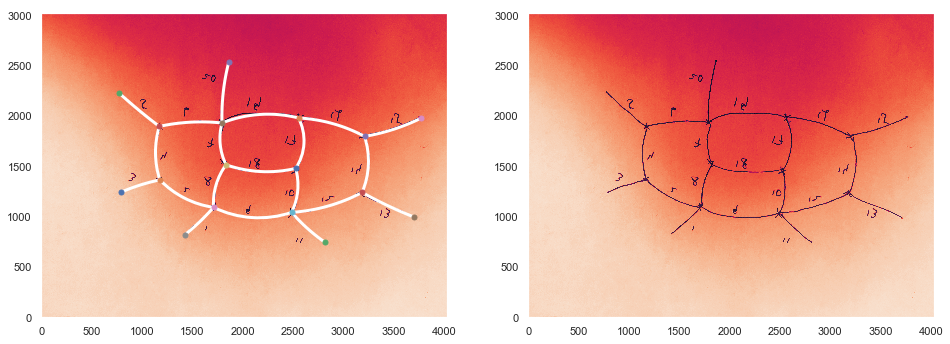

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'dark')

fig, (ax1, ax) = plt.subplots(1,2,figsize = (16,8))


imgplot = ax1.imshow(img, origin = 'lower')
[n.plot(ax1, markersize = 10) for n in nodes]
[n.plot(ax1, markersize = 20) for n in nodes if len(n.edges) == 2]
[e.plot(ax1, lw = 3) for e in edges]

#ax.set(xlim =[0,1000], ylim = [0,1000], aspect = 1)
imgplot = ax.imshow(img, origin = 'lower')
# [n.plot(ax, markersize = 10) for n in nodes]
# [n.plot(ax, markersize = 20) for n in nodes if len(n.edges) == 2]
# [e.plot(ax, lw = 3) for e in edges]
plt.show()

In [16]:
edges2 = [e for e in edges if e.radius is not None]
col1 = colony(cells, edges2, nodes)

In [45]:
tensions, P_T, A = col1.calculate_tension()

Initial Tension guess is [0.16, 0.85, 0.52, 0.0, 0.16, 0.28, 0.72, 0.43, 0.69, 0.54, 0.64, 0.21, 0.12, 0.28, 0.67, 0.42, 0.89, 0.45, 0.05, 0.68]
Trying L-BFGS
Which cell removed
basinhopping step 0: f 0.396981
basinhopping step 1: f 0.394769 trial_f 0.394769 accepted 1  lowest_f 0.394769
found new global minimum on step 1 with function value 0.394769
basinhopping step 2: f 0.399308 trial_f 0.399308 accepted 1  lowest_f 0.394769
basinhopping step 3: f 0.395172 trial_f 0.395172 accepted 1  lowest_f 0.394769
basinhopping step 4: f 0.388739 trial_f 0.388739 accepted 1  lowest_f 0.388739
found new global minimum on step 4 with function value 0.388739
basinhopping step 5: f 0.38776 trial_f 0.38776 accepted 1  lowest_f 0.38776
found new global minimum on step 5 with function value 0.38776
basinhopping step 6: f 0.392349 trial_f 0.392349 accepted 1  lowest_f 0.38776
basinhopping step 7: f 0.393254 trial_f 0.393254 accepted 1  lowest_f 0.38776
basinhopping step 8: f 0.402818 trial_f 0.402818 ac

basinhopping step 78: f 0.371705 trial_f 0.371705 accepted 1  lowest_f 0.359476
basinhopping step 79: f 0.387711 trial_f 0.387711 accepted 1  lowest_f 0.359476
adaptive stepsize: acceptance rate 0.975000 target 0.500000 new stepsize 0.116153 old stepsize 0.104538
basinhopping step 80: f 0.386504 trial_f 0.386504 accepted 1  lowest_f 0.359476
basinhopping step 81: f 0.386731 trial_f 0.386731 accepted 1  lowest_f 0.359476
basinhopping step 82: f 0.396956 trial_f 0.396956 accepted 1  lowest_f 0.359476
basinhopping step 83: f 0.393473 trial_f 0.393473 accepted 1  lowest_f 0.359476
basinhopping step 84: f 0.400413 trial_f 0.400413 accepted 1  lowest_f 0.359476
basinhopping step 85: f 0.400155 trial_f 0.400155 accepted 1  lowest_f 0.359476
basinhopping step 86: f 0.393419 trial_f 0.393419 accepted 1  lowest_f 0.359476
basinhopping step 87: f 0.394574 trial_f 0.394574 accepted 1  lowest_f 0.359476
basinhopping step 88: f 0.380807 trial_f 0.380807 accepted 1  lowest_f 0.359476
basinhopping ste

In [44]:
print(tensions)

[ 0.80445383  1.84689375  1.5803087  -0.65272975  1.99430395  1.81560919
 -0.33759519  0.27250125  1.74123499  0.40226856  0.37619146  2.25390178
  0.38145404 -0.11497974  1.53423386  0.50719597  1.97968064  0.97417231
  1.25807098  1.38282942]


In [47]:
mean_t = np.mean(tensions)
print([t/mean_t for t in tensions])

[0.6447014025997039, 1.4201942528982827, 1.2353133609132412, 0.000296571421606005, 1.5233812548185406, 1.4499189404639736, 0.12501220854475104, 0.6475668269544136, 1.7342930776297818, 0.8827581044904422, 0.8198183501993775, 1.8849962236753661, 0.7423067317841069, 0.2516863550690357, 1.155829628210883, 1.0840447610816624, 1.5795626369137843, 0.7364354389888409, 0.974647365892244, 1.1072365074499642]


In [18]:
np.linalg.cond(P_T)

99.12378041619297

In [19]:
pressures, P_P, B = col1.calculate_pressure(solver = 'KKT')

[[ 1. -1.  0.  0.]
 [ 1.  0. -1.  0.]
 [ 0.  1.  0. -1.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  1. -1.]]


In [20]:
np.linalg.cond(P_P)

2.0000000000000004

[(0, 3000), (0, 4000), None]

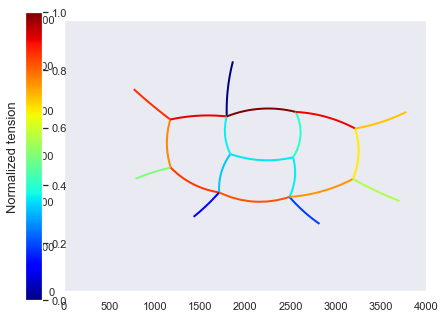

In [23]:
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (8,5))
col1.plot_tensions(ax, fig, tensions, specify_color = 1, lw = 2)
ax.set(xlim = [0,4000], ylim = [0,3000], aspect = 1)

In [26]:
np.shape(B)

(5, 4)

array([[ 1., -1.,  0.,  0.],
       [ 1.,  0., -1.,  0.],
       [ 0.,  1.,  0., -1.],
       [ 0.,  1., -1.,  0.],
       [ 0.,  0.,  1., -1.]])

In [66]:
np.linalg.det(A)

-0.06161481589901879

In [72]:
import scipy 

P = A
N = np.shape(A)[1]
Q = np.zeros((N, 1))

# R1, R2 = np.linalg.qr(P) # QR decomposition with qr function
# y = np.dot(R1.T, Q) # Let y=R1'.Q using matrix multiplication
# x = np.linalg.solve(R2, y) # Solve Rx=y 

# By least squares - gives same result
#x = linalg.lstsq(R2, y)


# By LU decomposition - Both give same results        
L, U = scipy.linalg.lu_factor(P)
x = scipy.linalg.lu_solve((L, U), Q)


print(x[0:N][:,0]) # use this if solved using linalg.solve

[-0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0.  0.
  0. -0.]


In [67]:
mean_x = np.mean(x[0:N][:,0])
print([a/(100*mean_x) for a in x[0:N][:,0]])


[-0.27166883221682936, 0.35391851402497226, 0.1299854742403506, -0.4847312008487388, 0.5353973682909555, -0.032037880364265255, -0.781903718170738, -0.5655919098784975, -0.423955966054158, -0.40142185913242445, -0.32726916133136225, 0.6622683405468868, -0.22089381968279437, -0.34199647359337576, 0.12294537464971679, -0.10122756824230847, 0.8933353677835574, 0.18703926659816403, 0.38227275984482556, 0.885535923536063]


In [61]:
mean_x

0.0004913596549316762

In [57]:
x[0:N][:,0]

array([-0.00133487,  0.00173901,  0.0006387 , -0.00238177,  0.00263073,
       -0.00015742, -0.00384196, -0.00277909, -0.00208315, -0.00197243,
       -0.00160807,  0.00325412, -0.00108538, -0.00168043,  0.0006041 ,
       -0.00049739,  0.00438949,  0.00091904,  0.00187833,  0.00435117])